In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 자음 기준 (중요성 있는 순서대로 나열)
# 1. 조음 위치
# 2. 조음 방법
# 3. 조음 강도
# 4. 유성음 여부

# Position (Bilabial) 0 --- 1 (Glottal)
conso_pos = { "Bilabial": 0, "Alveolar": 0.25, "Alveo-Palatal": 0.5, "Velar": 0.75, "Glottal": 1 }
# HowToPronunce (Plosive) 1 --- 0 (Lateral)
# 파열음(ㅂ, ㅍ, ㅃ, ㄷ, ㅌ, ㄸ, ㄱ, ㅋ, ㄲ), 마찰음(ㅅ, ㅆ, ㅎ), 파찰음(ㅈ, ㅊ, ㅉ), 비음(ㅁ, ㄴ, ㅇ), 유음(ㄹ)
conso_how = { "Plosive": 1, "Fricative": 0.75, "Affricate": 0.5, "Nasal": 0.25, "Lateral": 0 }
# Strength (Lenis) 0 --- 1 (Fortis)
conso_str = { "Lenis": 0, "Aspirated": 0.5, "Fortis": 1 }
# Voice or not (Yes) 1 --- 0 (No)
# 유성음인지 아닌지 구분
conso_voi = { "Yes": 1, "No": 0 }

consonants = pd.read_csv("csv/consonants.csv")
consonants["조음강도"] = consonants["조음강도"].replace("None", "Lenis") # None -> Lenis
print(consonants)

    IPA           조음위치       조음방법       조음강도 유성음여부
0     b       Bilabial    Plosive      Lenis   Yes
1    bʰ       Bilabial    Plosive  Aspirated   Yes
2    b*       Bilabial    Plosive     Fortis   Yes
3     p       Bilabial    Plosive      Lenis    No
4    pʰ       Bilabial    Plosive  Aspirated    No
5    p*       Bilabial    Plosive     Fortis    No
6     m       Bilabial      Nasal      Lenis   Yes
7     d       Alveolar    Plosive      Lenis   Yes
8    dʰ       Alveolar    Plosive  Aspirated   Yes
9    d*       Alveolar    Plosive     Fortis   Yes
10    t       Alveolar    Plosive      Lenis    No
11   tʰ       Alveolar    Plosive  Aspirated    No
12   t*       Alveolar    Plosive     Fortis    No
13    s       Alveolar  Fricative  Aspirated    No
14   s*       Alveolar  Fricative     Fortis    No
15    n       Alveolar      Nasal      Lenis    No
16    ɾ       Alveolar    Lateral      Lenis   Yes
17    l       Alveolar    Lateral      Lenis    No
18   dʑ  Alveo-Palatal  Affrica

In [4]:
# 입력된 문자열에서 자음 데이터만으로 조음 기관의 움직임 파악한다.

datas = [ "ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo", "ɑnnjjmassɛjjo", "hɑnnjjʌŋ kɑssɛjo", "mjjʌŋŋwadʑi  mjjʌŋŋɑɑndʑɛo" ]
value_of_data = []

# datas 에서 각 문자열에 대한 조음위치와 조음방법과 조음강도에 대한 수치를 저장한다.
for data in datas:
    values = []
    idx = 0
    while idx < len(data):
        ch = data[idx]
        skip = True
        for ipa in list(consonants["IPA"]):
            if data[idx:idx+len(ipa)] == ipa:
                skip = False
                conso_pos_ = conso_pos[consonants.loc[consonants["IPA"] == ipa]["조음위치"].iloc[0]]
                conso_how_ = conso_how[consonants.loc[consonants["IPA"] == ipa]["조음방법"].iloc[0]]
                conso_str_ = conso_str[consonants.loc[consonants["IPA"] == ipa]["조음강도"].iloc[0]]
                conso_voi_ = conso_voi[consonants.loc[consonants["IPA"] == ipa]["유성음여부"].iloc[0]]
                value = [conso_pos_, conso_how_, conso_str_, conso_voi_]
                values.append(value)
                idx += len(ipa)
        if skip == True:
            idx += 1
    value_of_data.append(values)
            
print(value_of_data)

[[[0.25, 0.25, 0, 0], [0.25, 0.25, 0, 0], [0.75, 0.25, 0, 1], [0.25, 0.75, 0.5, 0]], [[0.25, 0.25, 0, 0], [0.25, 1, 0, 1], [0, 0.25, 0, 1], [0.25, 0.25, 0, 0], [0.25, 0.75, 0.5, 0]], [[0.25, 0.25, 0, 0], [0.25, 0.25, 0, 0], [0, 0.25, 0, 1], [0.25, 0.75, 0.5, 0], [0.25, 0.75, 0.5, 0]], [[1, 0.75, 0.5, 0], [0.25, 0.25, 0, 0], [0.25, 0.25, 0, 0], [0.75, 0.25, 0, 1], [0.75, 1, 0, 0], [0.25, 0.75, 0.5, 0], [0.25, 0.75, 0.5, 0]], [[0, 0.25, 0, 1], [0.75, 0.25, 0, 1], [0.75, 0.25, 0, 1], [0.25, 1, 0, 1], [0, 0.25, 0, 1], [0.75, 0.25, 0, 1], [0.75, 0.25, 0, 1], [0.25, 0.25, 0, 0], [0.5, 0.5, 0, 1]]]


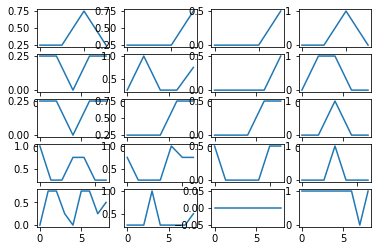

In [5]:
for idx, values in enumerate(value_of_data):
    conso_pos_list = [ value[0] for value in values ]
    conso_how_list = [ value[1] for value in values ]
    conso_str_list = [ value[2] for value in values ]
    conso_voi_list = [ value[3] for value in values ]
    
    # 조음위치
    plt.subplot(len(value_of_data), 4, idx*4 + 1)
    plt.plot(conso_pos_list)

    # 조음방법
    plt.subplot(len(value_of_data), 4, idx*4 + 2)
    plt.plot(conso_how_list)

    # 조음강도
    plt.subplot(len(value_of_data), 4, idx*4 + 3)
    plt.plot(conso_str_list)
    
    # 유성음여부
    plt.subplot(len(value_of_data), 4, idx*4 + 4)
    plt.plot(conso_voi_list)
    
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 모음 기준 (중요성 있는 순서대로 나열)
# 1. 입술 모양
# 2. 조음 좌우 위치
# 3. 조음 상하 위치

# shape (Unrounded) 0 --- 1 (Rounded)
vowel_shp = { "Unrounded": 0, "Rounded+Unrounded": 0.33, "Unrounded+Rounded": 0.66, "Rounded": 1 }
# width position (Front) 0 --- 1 (Back)
vowel_wps = { "Front": 0, "Back+Front": 0.33, "Front+Back": 0.66, "Back": 1 }
# height position (Low) 0 --- 1 (High)
vowel_hps = { "Low": 0, "Mid+Low": 0.2, "High+Low": 0.3, "Mid": 0.5, "High+Mid": 0.7, "High": 1 }

vowels = pd.read_csv("csv/vowels.csv")
print(vowels)

   IPA    조음상하위치      조음좌우위치               입술모양
0    i      High       Front          Unrounded
1    ɯ      High        Back          Unrounded
2    u      High        Back            Rounded
3    ɛ       Mid       Front          Unrounded
4    ʌ       Mid        Back          Unrounded
5    o       Mid        Back            Rounded
6    a       Low        Back          Unrounded
7   ju      High  Front+Back            Rounded
8   jʌ  High+Mid  Front+Back          Unrounded
9   jo  High+Mid  Front+Back            Rounded
10  jɛ  High+Mid  Front+Back          Unrounded
11  ja  High+Low  Front+Back          Unrounded
12  wi      High  Back+Front  Rounded+Unrounded
13  wʌ  High+Mid        Back  Rounded+Unrounded
14  wɛ  High+Mid  Back+Front  Rounded+Unrounded
15  wa   Mid+Low        Back  Rounded+Unrounded
16  ɰi      High  Back+Front  Unrounded+Rounded


In [11]:
# 입력된 문자열에서 자음 데이터만으로 조음 기관의 움직임 파악한다.

datas = [ "ɑnnjʌŋɑsɛjo", "ɑndɛʌmɑnsɛjjo", "ɑnnjjmassɛjjo", "hɑnnjjʌŋ kɑssɛjo", "mjjʌŋŋwadʑi  mjjʌŋŋɑɑndʑɛo" ]
value_of_data = []

# datas 에서 각 문자열에 대한 입술 모양, 조음 좌우 위치, 조음 상하 위치에 대한 수치를 저장한다.
for data in datas:
    values = []
    idx = 0
    while idx < len(data):
        ch = data[idx]
        skip = True
        for ipa in list(vowels["IPA"]):
            if data[idx:idx+len(ipa)] == ipa:
                skip = False
                vowel_shp_ = vowel_shp[vowels.loc[vowels["IPA"] == ipa]["입술모양"].iloc[0]]
                vowel_wps_ = vowel_wps[vowels.loc[vowels["IPA"] == ipa]["조음좌우위치"].iloc[0]]
                vowel_hps_ = vowel_hps[vowels.loc[vowels["IPA"] == ipa]["조음상하위치"].iloc[0]]
                value = [vowel_shp_, vowel_wps_, vowel_hps_]
                values.append(value)
                idx += len(ipa)
        if skip == True:
            idx += 1
    value_of_data.append(values)
            
print(value_of_data)

[[[0, 0.66, 0.7], [0, 0, 0.5], [1, 0.66, 0.7]], [[0, 0, 0.5], [0, 1, 0.5], [0, 0, 0.5], [1, 0.66, 0.7]], [[0, 1, 0], [0, 0, 0.5], [1, 0.66, 0.7]], [[0, 0.66, 0.7], [0, 0, 0.5], [1, 0.66, 0.7]], [[0, 0.66, 0.7], [0.33, 1, 0.2], [0, 0, 1], [0, 0.66, 0.7], [0, 0, 0.5], [1, 1, 0.5]]]


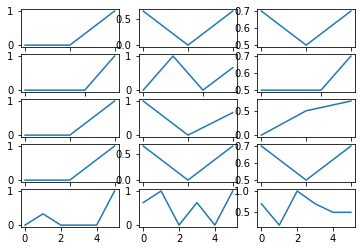

In [12]:
for idx, values in enumerate(value_of_data):
    vowel_shp_list = [ value[0] for value in values ]
    vowel_wps_list = [ value[1] for value in values ]
    vowel_hps_list = [ value[2] for value in values ]

    # 입술 모양
    plt.subplot(len(value_of_data), 3, idx*3 + 1)
    plt.plot(vowel_shp_list)

    # 조음 좌우 위치
    plt.subplot(len(value_of_data), 3, idx*3 + 2)
    plt.plot(vowel_wps_list)

    # 조음 상하 위치
    plt.subplot(len(value_of_data), 3, idx*3 + 3)
    plt.plot(vowel_hps_list)

plt.show()